#  Project A: Processing of a Sales Forecasting Model
## Group-02

**Accurately forecasting sales is a major challenge for retailers, influenced by factors like promotions, competition, holidays, seasonality, and locality. This project aims to predict six weeks of daily sales for 1,115 drug stores in Germany. Reliable forecasts can enhance store productivity, profitability, and customer satisfaction. The key challenges include accounting for various factors and dealing with missing historical data. Therefore, the historical dataset must be fully pre-processed to ensure reliable forecasts, involving tasks like data integration, visualization, cleaning, and transformation**


# Data Processing and Overview

## Importing Libraries

***Important Linraries for Data cleaning, reviewing, analysis and forecasting are imported and different packages ares installed***.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
!pip install xgboost
import xgboost as xgb
import time
import math
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.ticker import FuncFormatter
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib.pylab import rcParams
%matplotlib inline
from xgboost import plot_tree
!pip install graphviz
import os
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import pickle

## Loading Data Sets


### Data Reading
***We have three datasets:***

**1-Store.csv**

**2-train.csv**

**3-test.csv**

All three datasets were loaded, and subsequently, the Store and Train datasets were merged using the common parameter 'store' to create a unified dataset named 'working file'. Data types within the dataset were then examined, and necessary modifications were made to ensure their suitability for further processing.

In [2]:
store = pd.read_csv("D:\SRM\Python Programming\MGT001437_ProjectA\store.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\2806588840.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [3]:
store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [4]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31/07/2015,5263,555,1,1,0,1
1,2,5,31/07/2015,6064,625,1,1,0,1
2,3,5,31/07/2015,8314,821,1,1,0,1
3,4,5,31/07/2015,13995,1498,1,1,0,1
4,5,5,31/07/2015,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,01/01/2013,0,0,0,0,a,1
1017205,1112,2,01/01/2013,0,0,0,0,a,1
1017206,1113,2,01/01/2013,0,0,0,0,a,1
1017207,1114,2,01/01/2013,0,0,0,0,a,1


In [5]:
test

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,4,17/09/2015,NaN,NaN,1.0,1,0,0
1,3,4,17/09/2015,NaN,NaN,1.0,1,0,0
2,7,4,17/09/2015,NaN,NaN,1.0,1,0,0
3,8,4,17/09/2015,NaN,NaN,1.0,1,0,0
4,9,4,17/09/2015,NaN,NaN,1.0,1,0,0
...,...,...,...,...,...,...,...,...,...
41083,1111,6,01/08/2015,NaN,NaN,1.0,0,0,0
41084,1112,6,01/08/2015,NaN,NaN,1.0,0,0,0
41085,1113,6,01/08/2015,NaN,NaN,1.0,0,0,0
41086,1114,6,01/08/2015,NaN,NaN,1.0,0,0,0


### Merging Files
**Files are merged to create a unified data set for further processing**

In [6]:
working_file=pd.merge(train, store, on='Store')
working_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [7]:
test_file=pd.merge(test, store, on='Store')
test_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   DayOfWeek                  41088 non-null  int64  
 2   Date                       41088 non-null  object 
 3   Sales                      0 non-null      float64
 4   Customers                  0 non-null      float64
 5   Open                       41077 non-null  float64
 6   Promo                      41088 non-null  int64  
 7   StateHoliday               41088 non-null  object 
 8   SchoolHoliday              41088 non-null  int64  
 9   StoreType                  41088 non-null  object 
 10  Assortment                 41088 non-null  object 
 11  CompetitionDistance        40992 non-null  float64
 12  CompetitionOpenSinceMonth  25872 non-null  float64
 13  CompetitionOpenSinceYear   25872 non-null  flo

### Changing Datatype

In [8]:
working_file['Date'] = pd.to_datetime(working_file['Date'], format='%d/%m/%Y', dayfirst=True) #Data type of Date is converted from object to Datetime
working_file['Year'] = working_file['Date'].dt.year # a new column year is added to indicate year
working_file['Month'] = working_file['Date'].dt.month # a new column month is added to indicate month
working_file['Month_name'] = working_file['Date'].dt.strftime('%B') # a new column month is added to indicate month
working_file['Day'] =pd.to_datetime(working_file['Date']).dt.strftime('%A') # a new column Day is added to indicate name of the Day
working_file['Day_Count'] =working_file.Date.dt.day
working_file['WeekOfYear'] = working_file['Date'].dt.isocalendar().week

In [9]:
# Rearranging columns for better visualisation
working_file = working_file[['Store', 'DayOfWeek', 'Date', 'Day', 'Month', 'Year', 'Sales', 'Customers', 'Open', 'Promo', 
         'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 
         'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 
         'Promo2SinceYear', 'PromoInterval', 'WeekOfYear','Month_name','Day_Count']]
working_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Day                        1017209 non-null  object        
 4   Month                      1017209 non-null  int64         
 5   Year                       1017209 non-null  int64         
 6   Sales                      1017209 non-null  int64         
 7   Customers                  1017209 non-null  int64         
 8   Open                       1017209 non-null  int64         
 9   Promo                      1017209 non-null  int64         
 10  StateHoliday               1017209 non-null  object        
 11  SchoolHoliday              1017209 no

In [10]:
test_file['Date'] = pd.to_datetime(test_file['Date'], format='%d/%m/%Y', dayfirst=True) # Data type of Date is converted from object to Datetime
test_file['Year'] = test_file['Date'].dt.year # A new column year is added to indicate year
test_file['Month'] = test_file['Date'].dt.month # A new column month is added to indicate month
test_file['Month_name'] = test_file['Date'].dt.strftime('%B') # a new column month is added to indicate month
test_file['Day'] = pd.to_datetime(test_file['Date']).dt.strftime('%A') # A new column day is added to indicate day
test_file['Day_Count'] =test_file.Date.dt.day
test_file['WeekOfYear'] = test_file.Date.dt.isocalendar().week

In [11]:
# Rearranging columns for better visualisation
test_file = test_file[['Store', 'DayOfWeek', 'Date', 'Day', 'Month', 'Year', 'Sales', 'Customers', 'Open', 'Promo', 
         'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 
         'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 
         'Promo2SinceYear', 'PromoInterval','WeekOfYear','Month_name','Day_Count']]
test_file.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Store                      41088 non-null  int64         
 1   DayOfWeek                  41088 non-null  int64         
 2   Date                       41088 non-null  datetime64[ns]
 3   Day                        41088 non-null  object        
 4   Month                      41088 non-null  int64         
 5   Year                       41088 non-null  int64         
 6   Sales                      0 non-null      float64       
 7   Customers                  0 non-null      float64       
 8   Open                       41077 non-null  float64       
 9   Promo                      41088 non-null  int64         
 10  StateHoliday               41088 non-null  object        
 11  SchoolHoliday              41088 non-null  int64         
 12  Stor

## Preprocessing of Data

***Working file was divided into two parts:***

***1. Store_Open_data***

***2. Store_Close_data***

This was done for data exploration and initial Analysis. In order to have yearwise overview of data and visualisation further subdatasets were created naming:

1-Year_2013

2-Year_2014

3-Year_2015

In [12]:
Store_open_data= working_file[working_file["Open"]>=1]
Store_open_data

,Store,DayOfWeek,Date,Day,Month,Year,Sales,Customers,Open,Promo,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,Month_name,Day_Count
0,1,5,2015-07-31,Friday,7,2015,5263,555,1,1,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,July,31
1,1,4,2015-07-30,Thursday,7,2015,5020,546,1,1,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,July,30
2,1,3,2015-07-29,Wednesday,7,2015,4782,523,1,1,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,July,29
3,1,2,2015-07-28,Tuesday,7,2015,5011,560,1,1,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,July,28
4,1,1,2015-07-27,Monday,7,2015,6102,612,1,1,...,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,July,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,Monday,1,2013,6905,471,1,1,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2,January,7
1017204,1115,6,2013-01-05,Saturday,1,2013,4771,339,1,0,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,January,5
1017205,1115,5,2013-01-04,Friday,1,2013,4540,326,1,0,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,January,4
1017206,1115,4,2013-01-03,Thursday,1,2013,4297,300,1,0,...,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,January,3


In [13]:
Store_closed_data= working_file[working_file["Open"]==0]

In [14]:
Year_2013 = Store_open_data[Store_open_data['Year'] == 2013]
Year_2014 = Store_open_data[Store_open_data['Year'] == 2014]
Year_2015 = Store_open_data[Store_open_data['Year'] == 2015]

In [15]:
# Separate data into promotional and non-promotional periods
promotional_sales = Store_open_data[Store_open_data['Promo'] == 1]['Sales']
non_promotional_sales = Store_open_data[Store_open_data['Promo'] == 0]['Sales']

# Calculate average sales for each group
average_promo_sales = promotional_sales.mean()
average_non_promo_sales = non_promotional_sales.mean()

# Compare average sales
sales_impact = average_promo_sales - average_non_promo_sales

# Print the results
print("Average sales during promotional periods:", average_promo_sales)
print("Average sales during non-promotional periods:", average_non_promo_sales)
print("Impact of promotion on sales:", sales_impact)


Average sales during promotional periods: 8228.281239386994
Average sales during non-promotional periods: 5929.407603487516
Impact of promotion on sales: 2298.8736358994774


## Introduction and Data Overview

In [16]:
working_file.describe()

,Store,DayOfWeek,Month,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,WeekOfYear,Day_Count
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,1017209.0,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.846762e+00,2.013832e+03,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,23.615515,1.570279e+01
std,3.219087e+02,1.997391e+00,3.326097e+00,7.773960e-01,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,14.433381,8.787638e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,2.013000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,1.0,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.000000e+00,2.013000e+03,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,11.0,8.000000e+00
50%,5.580000e+02,4.000000e+00,6.000000e+00,2.014000e+03,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,22.0,1.600000e+01
75%,8.380000e+02,6.000000e+00,8.000000e+00,2.014000e+03,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,35.0,2.300000e+01
max,1.115000e+03,7.000000e+00,1.200000e+01,2.015000e+03,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000,52.0,3.100000e+01


In [17]:
Store_open_data.describe()

,Store,DayOfWeek,Month,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,WeekOfYear,Day_Count
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.0,844392.000000,844392.000000,842206.000000,575773.000000,575773.000000,844392.000000,421085.000000,421085.000000,844392.0,844392.000000
mean,558.422920,3.520361,5.845738,2013.831937,6955.514291,762.728395,1.0,0.446352,0.193580,5457.979627,7.224879,2008.697747,0.498684,23.253426,2011.754019,23.646801,15.835683
std,321.731914,1.723689,3.323931,0.777260,3104.214680,401.227674,0.0,0.497114,0.395103,7809.437311,3.210144,5.978048,0.499999,14.100569,1.660962,14.389785,8.683456
min,1.000000,1.000000,1.000000,2013.000000,0.000000,0.000000,1.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.0,1.000000
25%,280.000000,2.000000,3.000000,2013.000000,4859.000000,519.000000,1.0,0.000000,0.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,11.0,8.000000
50%,558.000000,3.000000,6.000000,2014.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,23.0,16.000000
75%,837.000000,5.000000,8.000000,2014.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,35.0,23.000000
max,1115.000000,7.000000,12.000000,2015.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,52.0,31.000000


In [18]:
Store_closed_data.describe()

,Store,DayOfWeek,Month,Year,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,WeekOfYear,Day_Count
count,172817.000000,172817.000000,172817.000000,172817.000000,172817.0,172817.0,172817.0,172817.000000,172817.000000,172361.000000,118088.000000,118088.000000,172817.000000,88093.000000,88093.000000,172817.0,172817.000000
mean,558.462987,6.333769,5.851768,2013.834027,0.0,0.0,0.0,0.064716,0.105684,5293.787574,7.213053,2008.653563,0.509747,23.343977,2011.746824,23.462645,15.053467
std,322.771734,1.547688,3.336661,0.778058,0.0,0.0,0.0,0.246025,0.307434,7236.355140,3.220047,6.063202,0.499906,14.073822,1.671959,14.64361,9.252490
min,1.000000,1.000000,1.000000,2013.000000,0.0,0.0,0.0,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.0,1.000000
25%,279.000000,7.000000,3.000000,2013.000000,0.0,0.0,0.0,0.000000,0.000000,700.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,12.0,7.000000
50%,560.000000,7.000000,5.000000,2014.000000,0.0,0.0,0.0,0.000000,0.000000,2370.000000,7.000000,2009.000000,1.000000,22.000000,2012.000000,21.0,15.000000
75%,839.000000,7.000000,8.000000,2014.000000,0.0,0.0,0.0,0.000000,0.000000,6870.000000,10.000000,2012.000000,1.000000,37.000000,2013.000000,35.0,23.000000
max,1115.000000,7.000000,12.000000,2015.000000,0.0,0.0,0.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,52.0,31.000000


## Exploratory Data Analysis

### Total Sales

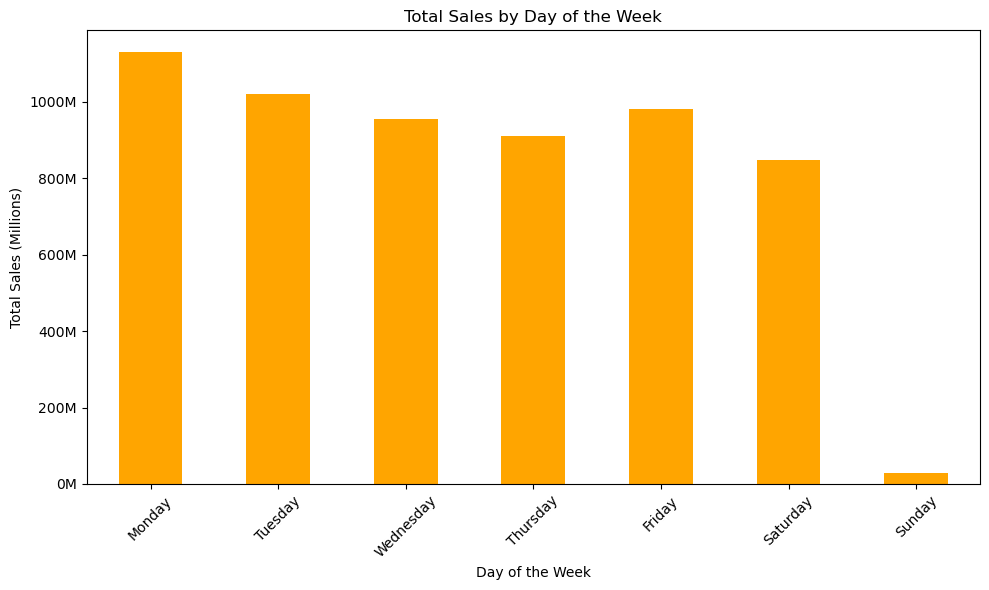

In [19]:
daily_sales = working_file.groupby('Day')['Sales'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex daily_sales to match the specified order
daily_sales = daily_sales.reindex(days_order)

# Plotting
plt.figure(figsize=(10, 6))
bar_plot = daily_sales.plot(kind='bar', color='orange')

# Format y-axis labels to display values in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))

plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales (Millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

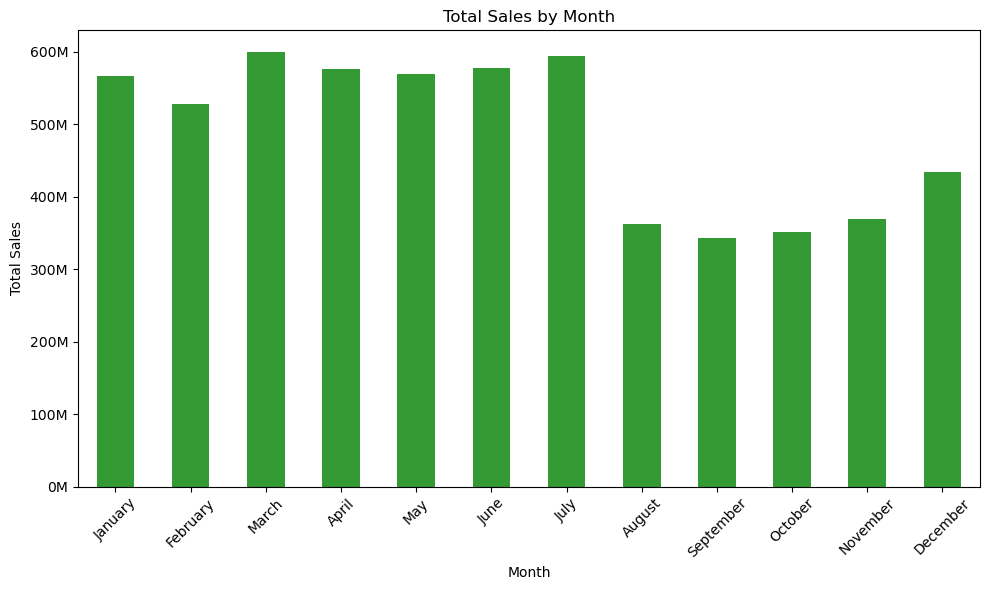

In [20]:
month_sales = working_file.groupby('Month_name')['Sales'].sum()
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
month_sales = month_sales.reindex(months_order)

# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales.plot(kind='bar', color='green', alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\2176879626.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Month_name'] = pd.Categorical(Store_open_data['Month_name'], categories=months_order, ordered=True)


<Figure size 1400x800 with 0 Axes>

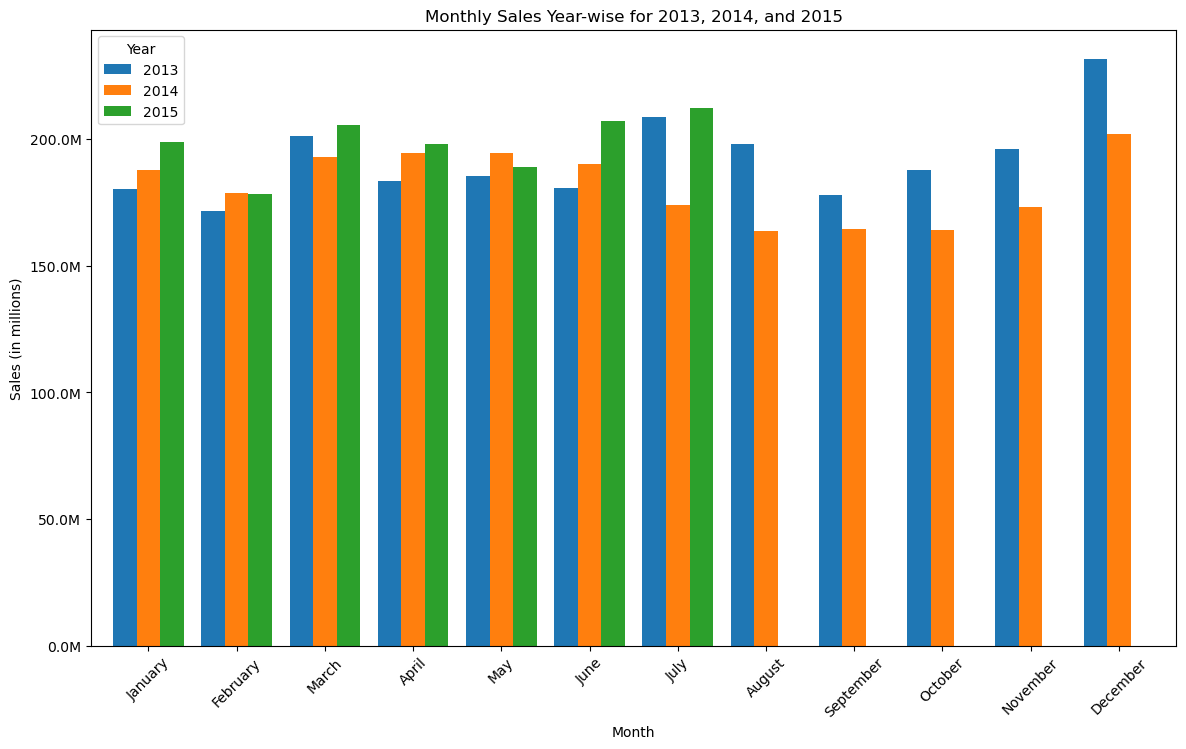

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column to a categorical type with the specified order
Store_open_data['Month_name'] = pd.Categorical(Store_open_data['Month_name'], categories=months_order, ordered=True)

# Filter data for the years 2013, 2014, and 2015
Store_open_data_filtered = Store_open_data[Store_open_data['Year'].isin([2013, 2014, 2015])]

# Group by Year and Month and sum the Sales
monthly_sales_yearwise = Store_open_data_filtered.groupby(['Year', 'Month_name'])['Sales'].sum().unstack(level=0)

# Plot the bar chart
plt.figure(figsize=(14, 8))
bar_plot = monthly_sales_yearwise.plot(kind='bar', width=0.8, figsize=(14, 8))

# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45)

# Format the y-axis labels to show sales in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Monthly Sales Year-wise for 2013, 2014, and 2015')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')
plt.legend(title='Year')
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\4209496510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Month_name'] = pd.Categorical(Store_open_data['Month_name'], categories=months_order, ordered=True)


<Figure size 1400x800 with 0 Axes>

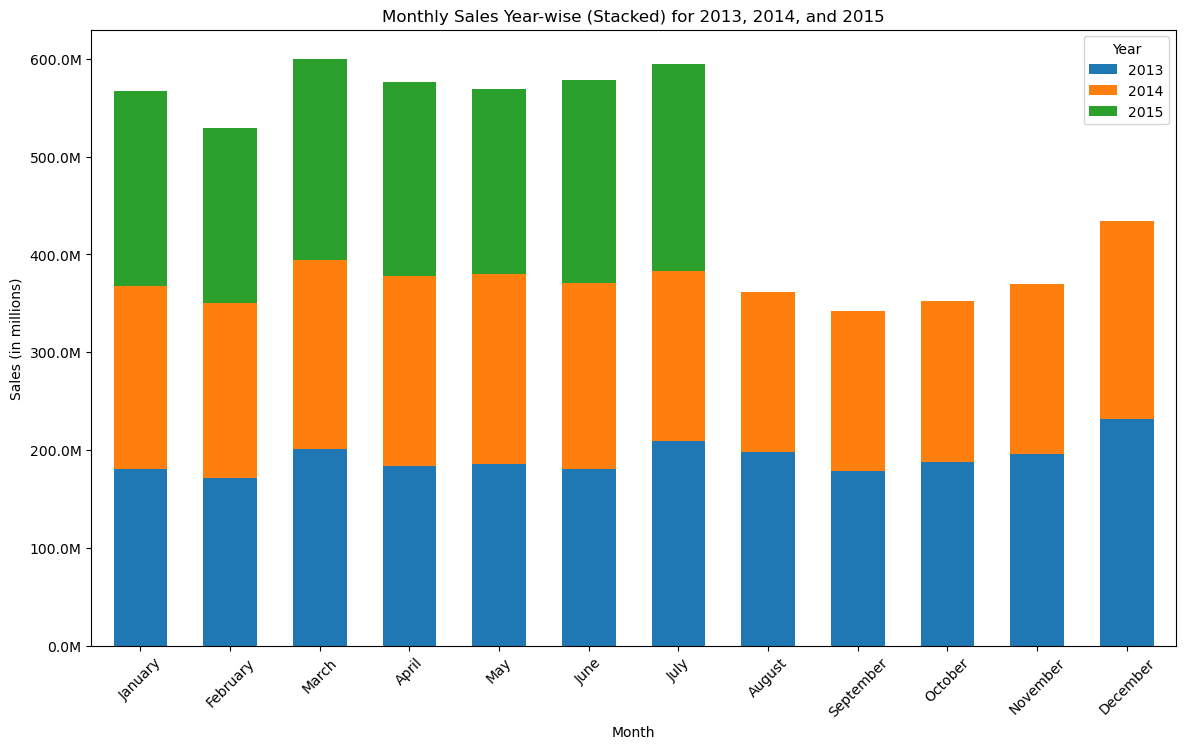

In [22]:
Store_open_data['Month_name'] = pd.Categorical(Store_open_data['Month_name'], categories=months_order, ordered=True)

# Filter data for the years 2013, 2014, and 2015
Store_open_data_filtered = Store_open_data[Store_open_data['Year'].isin([2013, 2014, 2015])]

# Group by Year and Month and sum the Sales
monthly_sales_yearwise = Store_open_data_filtered.groupby(['Year', 'Month'])['Sales'].sum().unstack(level=0)

# Plot the stacked bar chart
plt.figure(figsize=(14, 8))
bar_plot = monthly_sales_yearwise.plot(kind='bar', stacked=True, width=0.6, figsize=(14, 8))

# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45)

# Format the y-axis labels to show sales in millions
bar_plot.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.1f}M'.format(x / 1e6)))

plt.title('Monthly Sales Year-wise (Stacked) for 2013, 2014, and 2015')
plt.xlabel('Month')
plt.ylabel('Sales (in millions)')
plt.legend(title='Year')
plt.show()


### Impact of Promotions

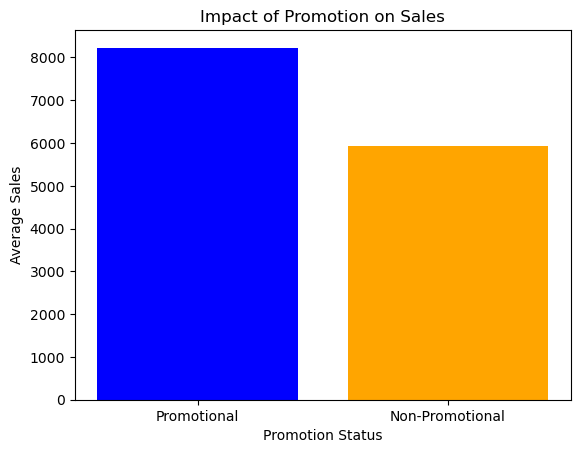

In [23]:
average_promo_sales = promotional_sales.mean()
average_non_promo_sales = non_promotional_sales.mean()

# Create a bar chart
labels = ['Promotional', 'Non-Promotional']
average_sales = [average_promo_sales, average_non_promo_sales]

plt.bar(labels, average_sales, color=['blue', 'orange'])
plt.xlabel('Promotion Status')
plt.ylabel('Average Sales')
plt.title('Impact of Promotion on Sales')
plt.show()

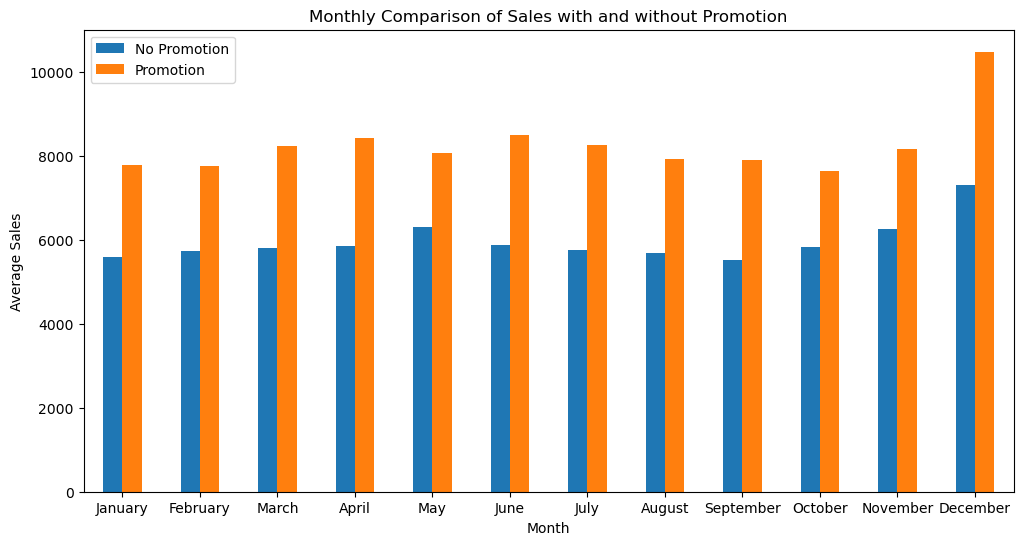

In [24]:
monthly_sales_comparison = Store_open_data.groupby(['Month_name', 'Promo'])['Sales'].mean().unstack()

# Plot the monthly comparison
monthly_sales_comparison.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.title('Monthly Comparison of Sales with and without Promotion')
plt.xticks(rotation=0)
plt.legend(['No Promotion', 'Promotion'])
plt.show()

### Monthly Sales 

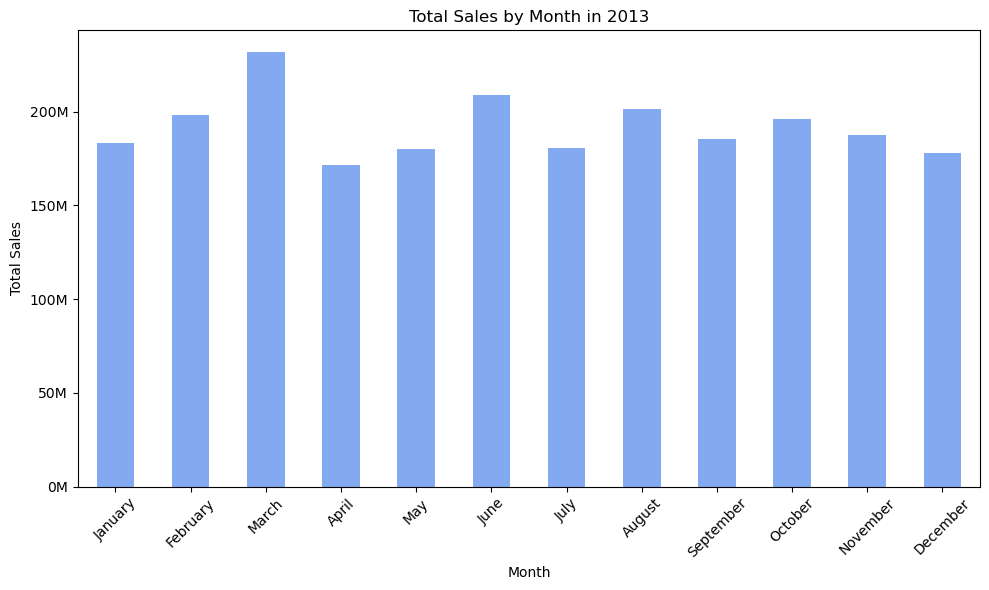

In [25]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# Group by month and sum the sales
month_sales_2013 = Year_2013.groupby(['Month_name'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2013.plot(kind='bar', color="cornflowerblue", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2013')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45) 
plt.tight_layout()
plt.show()


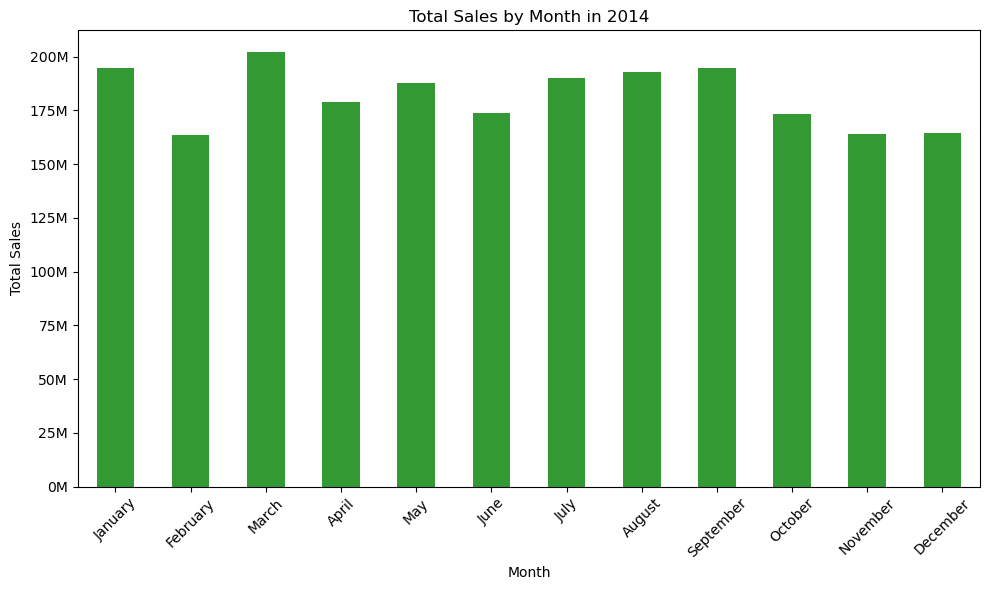

In [26]:
# Group by month and sum the sales
month_sales_2014 = Year_2014.groupby(['Month_name'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2014.plot(kind='bar', color="green", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2014')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45)
plt.tight_layout()
plt.show()

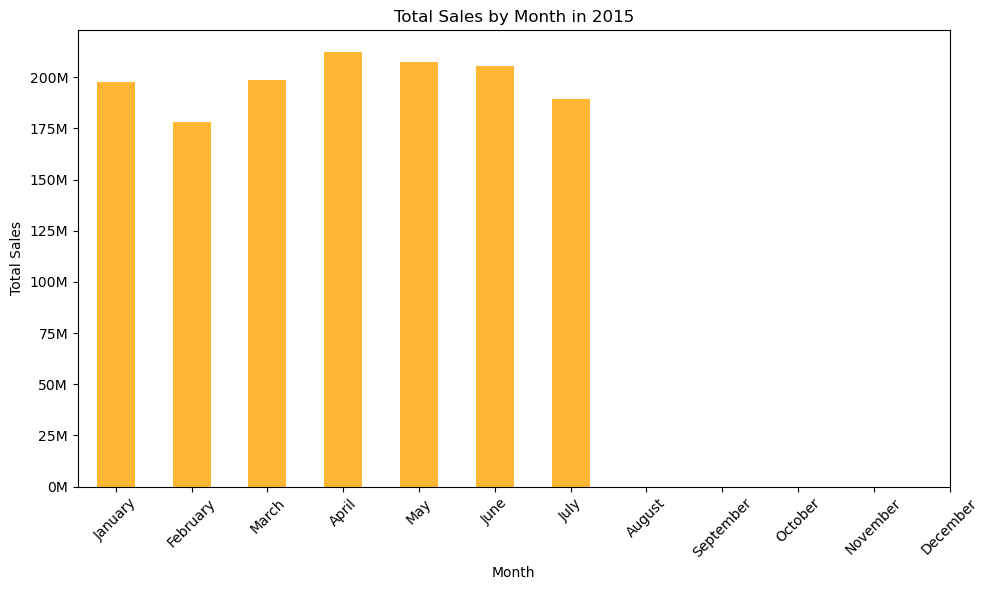

In [27]:
month_sales_2015 = Year_2015.groupby(['Month_name'])['Sales'].sum()
colors = ['black', 'dimgray', 'dimgrey', 'darkgray', 'silver', 'lightgray', 'whitesmoke', 'oldlace', 'antiquewhite', 'azure', 'mintcream', 'lavender']
# Plot the bar chart
plt.figure(figsize=(10, 6))
month_sales_2015.plot(kind='bar', color="orange", alpha=0.8)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:.0f}M'.format(x / 1000000)))
plt.title('Total Sales by Month in 2015')
plt.xlabel('Month')
plt.ylabel('Total Sales')
# Set x-ticks to correspond to month names from the 'Month' column
plt.xticks(range(0, 12), months_order, rotation=45) 
plt.tight_layout()
plt.show()


### Impact of Competition Distance

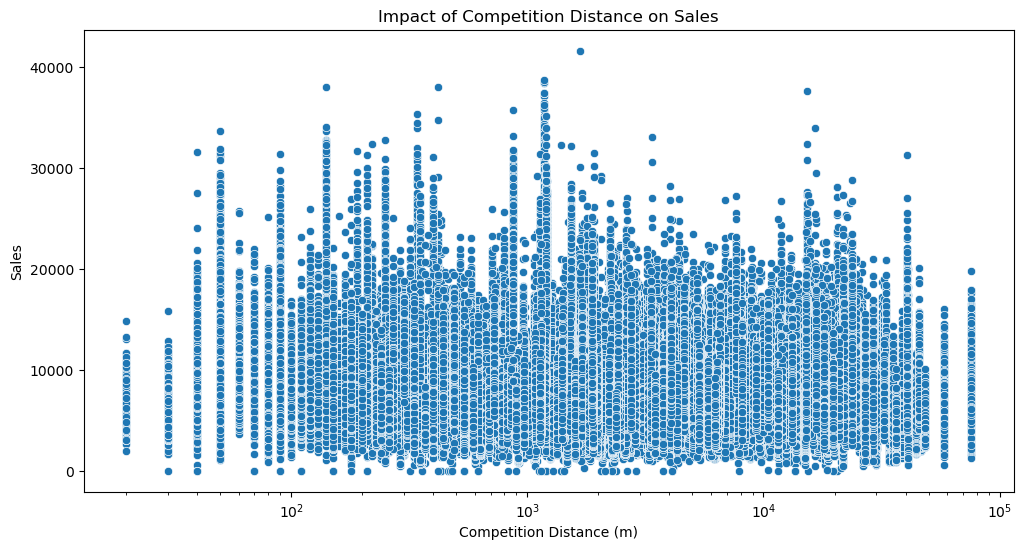

In [28]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales'])
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=data)
plt.title('Impact of Competition Distance on Sales')
plt.xlabel('Competition Distance (m)')
plt.ylabel('Sales')
plt.xscale('log')  # Log scale for better visualization given the large range of competition distances
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\4208039006.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


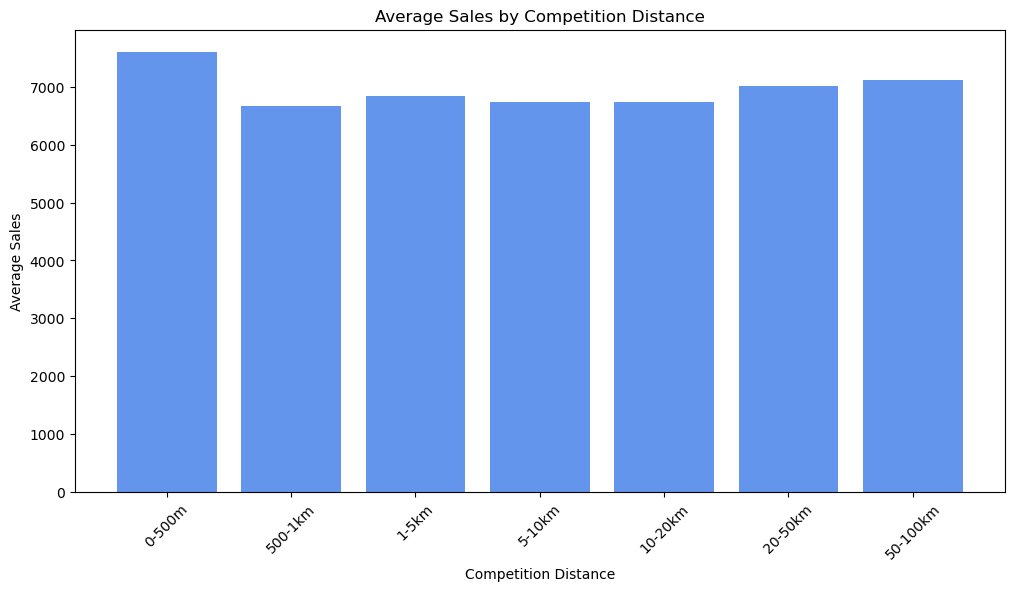

In [29]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate the average sales for each bin
average_sales = data.groupby('Distance Bin')['Sales'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.bar(average_sales['Distance Bin'], average_sales['Sales'], color='cornflowerblue')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\2860405988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


<Figure size 1200x600 with 0 Axes>

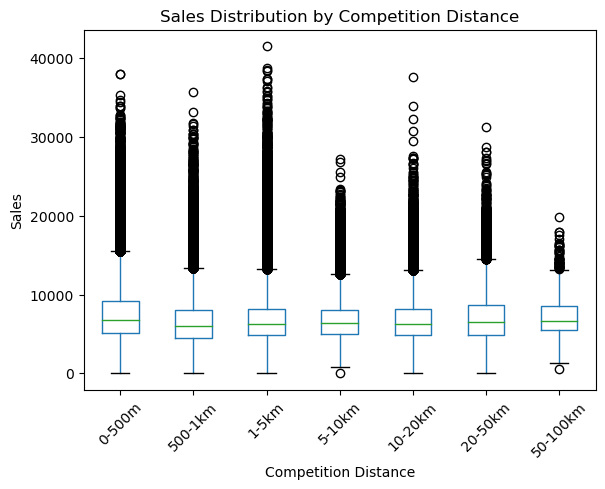

In [30]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Plotting
plt.figure(figsize=(12, 6))
data.boxplot(column='Sales', by='Distance Bin', grid=False)
plt.title('Sales Distribution by Competition Distance')
plt.suptitle('')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\4134151223.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


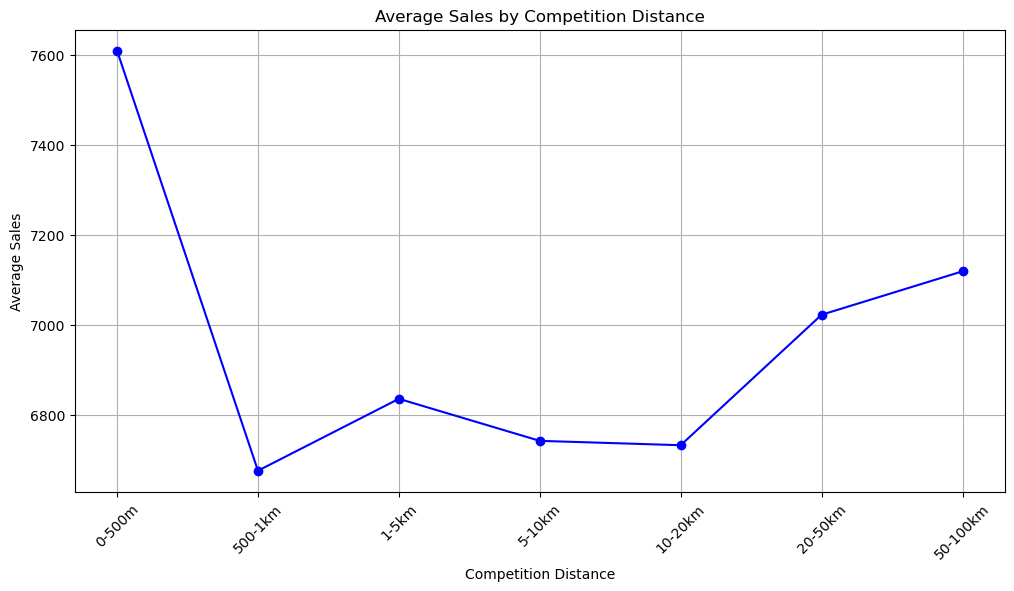

In [31]:
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate the average sales for each bin
average_sales = data.groupby('Distance Bin')['Sales'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_sales['Distance Bin'], average_sales['Sales'], marker='o', linestyle='-', color='b')
plt.title('Average Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### General Analysis

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\1999251042.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


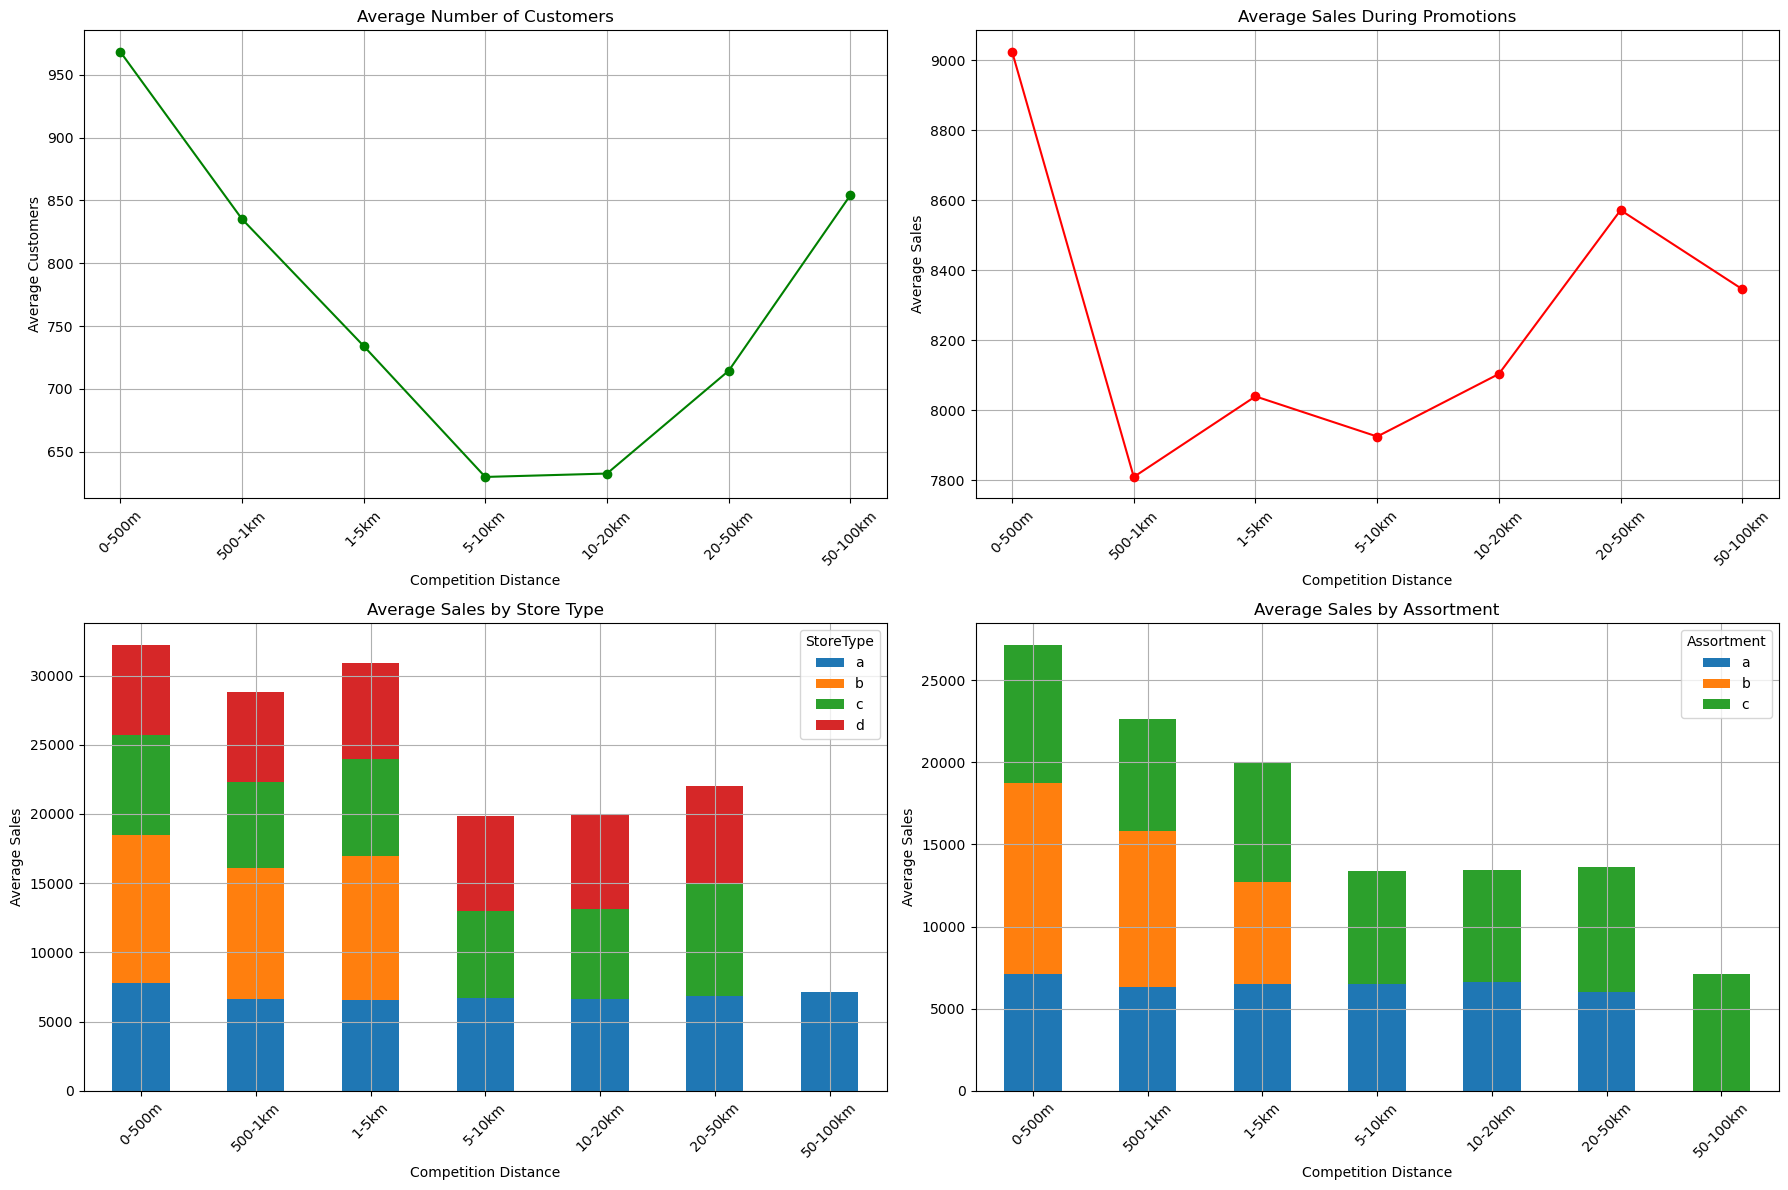

In [32]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales', 'Customers', 'StoreType', 'Promo', 'Assortment'])

# Define distance bins and labels
bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average customers per distance bin
average_customers = data.groupby('Distance Bin')['Customers'].mean().reset_index()

# Calculate average sales during promotions per distance bin
average_sales_promo = data[data['Promo'] == 1].groupby('Distance Bin')['Sales'].mean().reset_index()

# Calculate average sales by store type and distance bin
average_sales_storetype = data.groupby(['Distance Bin', 'StoreType'])['Sales'].mean().unstack().reset_index()

# Calculate average sales by assortment and distance bin
average_sales_assortment = data.groupby(['Distance Bin', 'Assortment'])['Sales'].mean().unstack().reset_index()

# Plotting in subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

# Plot 1: Average Number of Customers by Competition Distance
axes[0, 0].plot(average_customers['Distance Bin'], average_customers['Customers'], marker='o', linestyle='-', color='g')
axes[0, 0].set_title('Average Number of Customers')
axes[0, 0].set_xlabel('Competition Distance')
axes[0, 0].set_ylabel('Average Customers')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True)

# Plot 2: Average Sales During Promotions by Competition Distance
axes[0, 1].plot(average_sales_promo['Distance Bin'], average_sales_promo['Sales'], marker='o', linestyle='-', color='r')
axes[0, 1].set_title('Average Sales During Promotions')
axes[0, 1].set_xlabel('Competition Distance')
axes[0, 1].set_ylabel('Average Sales')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True)

# Plot 3: Average Sales by Store Type and Competition Distance
average_sales_storetype.plot(ax=axes[1, 0], x='Distance Bin', kind='bar', stacked=True)
axes[1, 0].set_title('Average Sales by Store Type')
axes[1, 0].set_xlabel('Competition Distance')
axes[1, 0].set_ylabel('Average Sales')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True)

# Plot 4: Average Sales by Assortment and Competition Distance
average_sales_assortment.plot(ax=axes[1, 1], x='Distance Bin', kind='bar', stacked=True)
axes[1, 1].set_title('Average Sales by Assortment')
axes[1, 1].set_xlabel('Competition Distance')
axes[1, 1].set_ylabel('Average Sales')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [33]:
data = Store_open_data.dropna(subset=['CompetitionDistance', 'Sales', 'Customers', 'StoreType', 'Promo', 'Assortment'])

bins = [0, 500, 1000, 5000, 10000, 20000, 50000, 100000]
labels = ['0-500m', '500-1km', '1-5km', '5-10km', '10-20km', '20-50km', '50-100km']
data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)

# Calculate average customers per distance bin
average_customers = data.groupby('Distance Bin')['Customers'].mean().reset_index()

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\3258733898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Distance Bin'] = pd.cut(data['CompetitionDistance'], bins=bins, labels=labels)


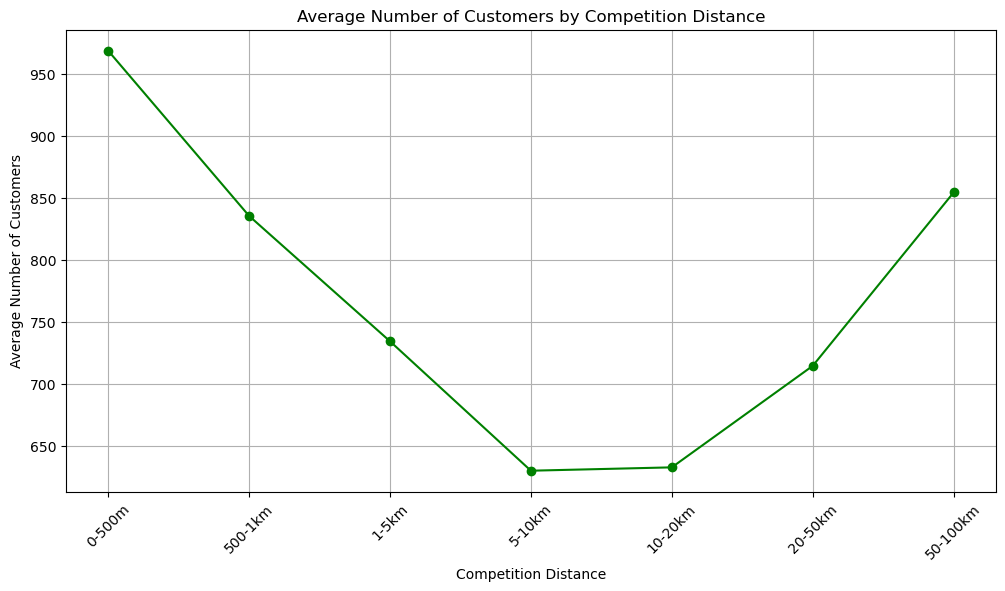

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(average_customers['Distance Bin'], average_customers['Customers'], marker='o', linestyle='-', color='g')
plt.title('Average Number of Customers by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


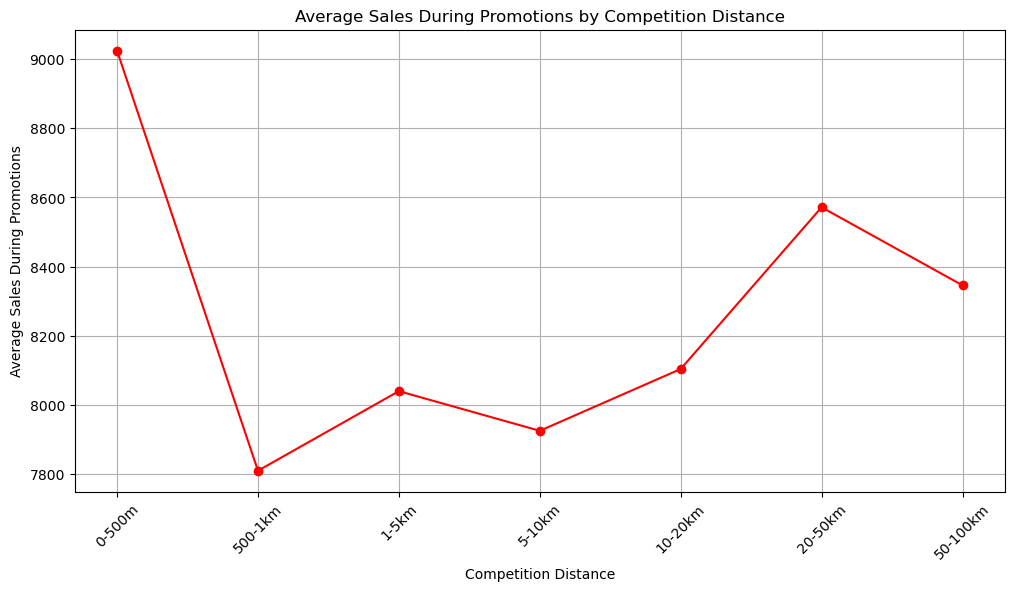

In [35]:
average_sales_promo = data[data['Promo'] == 1].groupby('Distance Bin')['Sales'].mean().reset_index()

# Plot and save average sales during promotions per distance bin
plt.figure(figsize=(12, 6))
plt.plot(average_sales_promo['Distance Bin'], average_sales_promo['Sales'], marker='o', linestyle='-', color='r')
plt.title('Average Sales During Promotions by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales During Promotions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


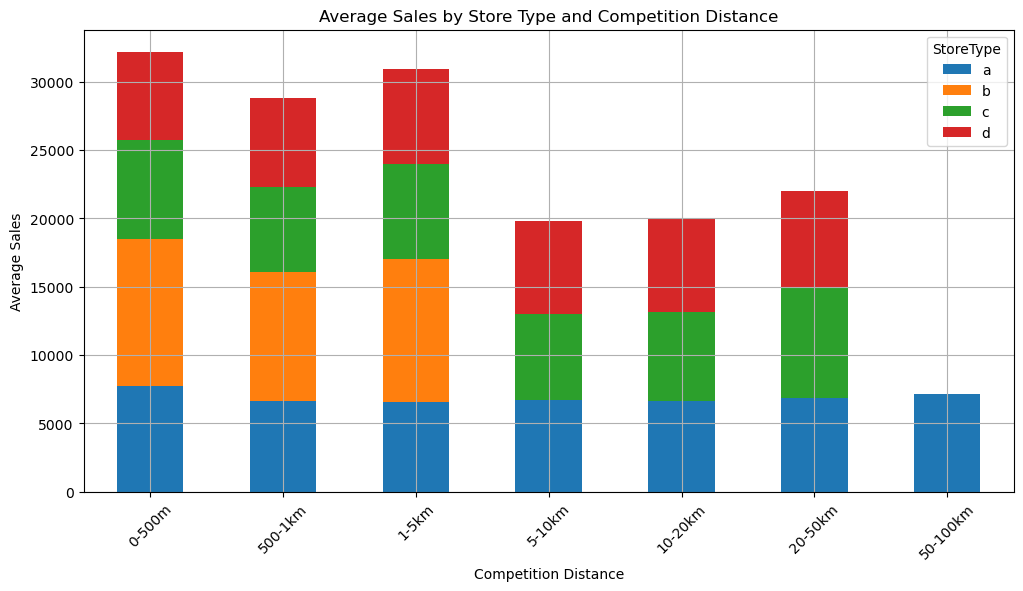

In [36]:
average_sales_storetype = data.groupby(['Distance Bin', 'StoreType'])['Sales'].mean().unstack().reset_index()

# Plot and save average sales by store type and distance bin
average_sales_storetype.plot(x='Distance Bin', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sales by Store Type and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


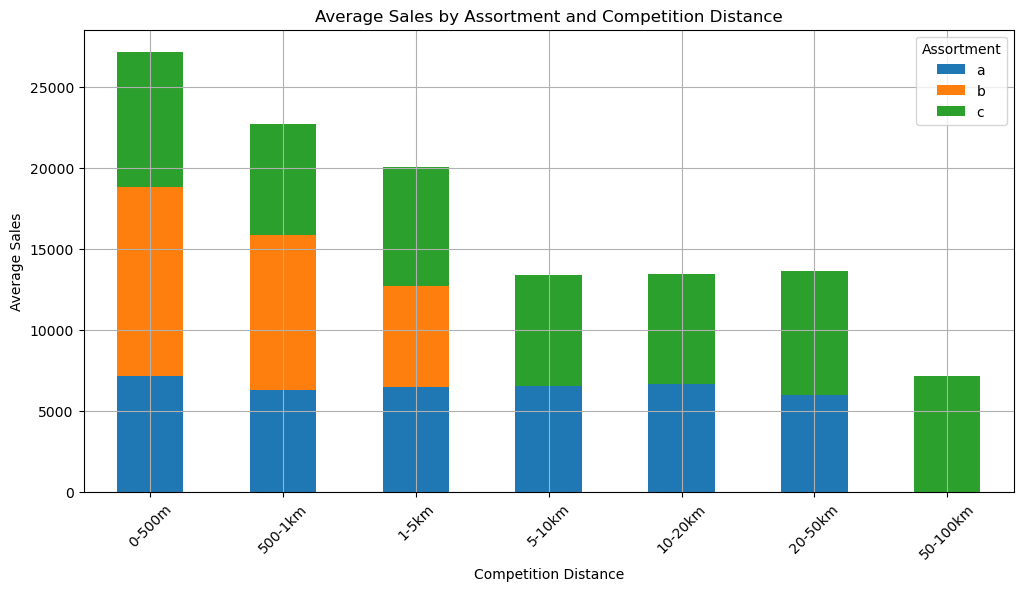

In [37]:
average_sales_assortment = data.groupby(['Distance Bin', 'Assortment'])['Sales'].mean().unstack().reset_index()
average_sales_assortment.plot(x='Distance Bin', kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Sales by Assortment and Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


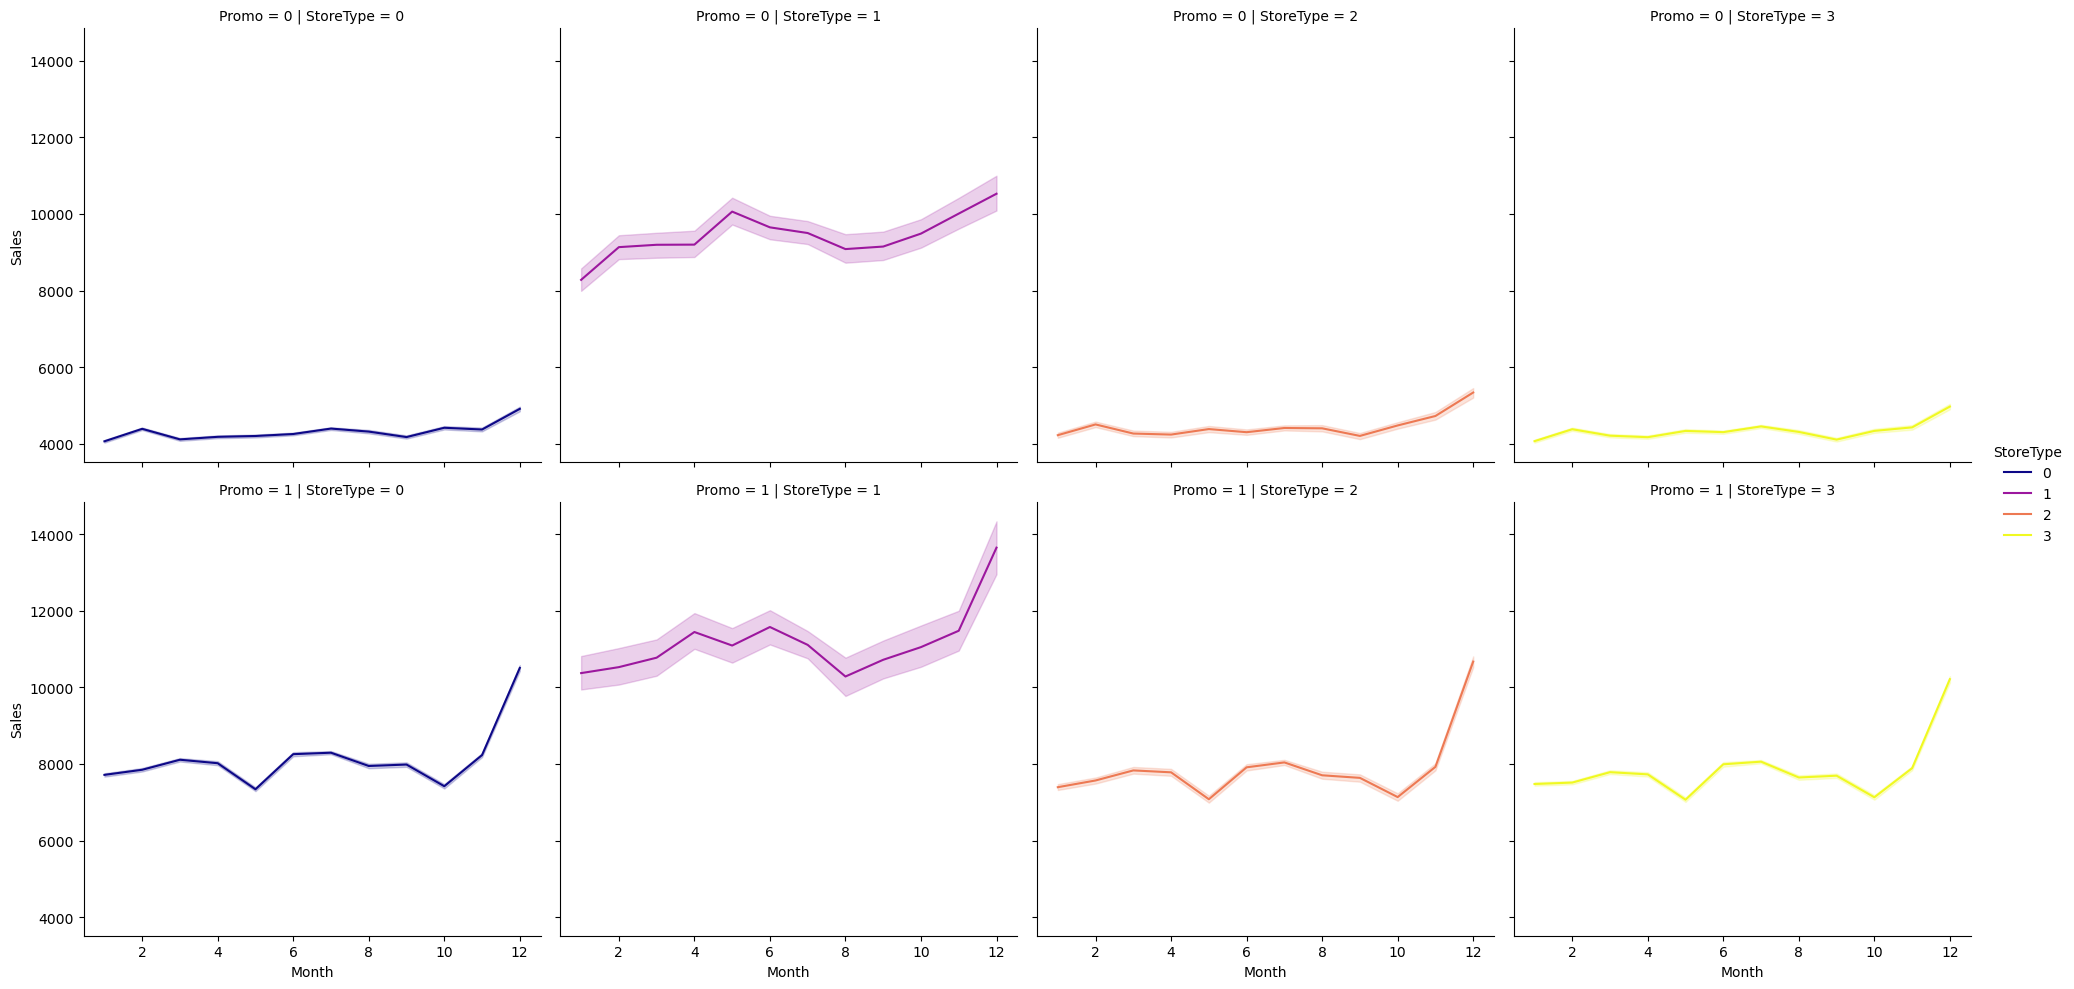

In [38]:
from sklearn.preprocessing import LabelEncoder
working_file['StateHoliday'] = working_file['StateHoliday'].astype(str)
le = LabelEncoder()
working_file['StoreType'] = le.fit_transform(working_file['StoreType'])
working_file['Assortment'] = le.fit_transform(working_file['Assortment'])
working_file['StateHoliday'] = le.fit_transform(working_file['StateHoliday'])
sns.relplot(x='Month', y='Sales', data=working_file, col='StoreType', palette='plasma', hue='StoreType', row='Promo', kind='line')
plt.show()

# Regression Model

## Gradient Boosting

### Competition and Promotion Value handling

#### Competition Handling

***In order to get the value of months since opening of competition we create a function and apply it to both files. We will have a new column competition_Open indicating number of months since Competition's store is functioning***

In [39]:
def comp_months(Store_open_data):
    Store_open_data['CompetitionOpen'] = 12 * (Store_open_data.Year - Store_open_data.CompetitionOpenSinceYear) + (Store_open_data.Month - Store_open_data.CompetitionOpenSinceMonth)
    Store_open_data['CompetitionOpen'] = Store_open_data['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).fillna(0)

In [40]:
comp_months(Store_open_data)
comp_months(test_file)

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\995313214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['CompetitionOpen'] = 12 * (Store_open_data.Year - Store_open_data.CompetitionOpenSinceYear) + (Store_open_data.Month - Store_open_data.CompetitionOpenSinceMonth)
C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\995313214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['CompetitionOpen'] = Store_open_data['CompetitionOpen'].map(lambda x: 0 if x < 0 else x).filln

In [41]:
Store_open_data[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(20)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
771343,2015-02-10,190.0,NaN,NaN,0.0
226470,2015-01-20,3520.0,NaN,NaN,0.0
725220,2013-11-20,7180.0,2012.0,11.0,12.0
761774,2013-06-11,2720.0,2012.0,9.0,9.0
29923,2014-03-03,1320.0,2013.0,5.0,10.0
347692,2015-07-17,26130.0,2002.0,11.0,152.0
501546,2015-07-25,2190.0,2013.0,9.0,22.0
298380,2013-04-18,3130.0,2002.0,7.0,129.0
180277,2015-02-02,1650.0,2000.0,10.0,172.0
34283,2014-08-16,1090.0,2007.0,4.0,88.0


#### Promotion Handling
***A new function is created to identify how long store has been running Promo2 and to check will the promo2 be going on in current month or not***

In [42]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(Store_open_data):
    # Months since Promo2 was open
    Store_open_data['Promo2Open'] = 12 * (Store_open_data.Year - Store_open_data.Promo2SinceYear) +  (Store_open_data.WeekOfYear - Store_open_data.Promo2SinceWeek)*7/30.5
    Store_open_data['Promo2Open'] = Store_open_data['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * Store_open_data['Promo2']
    # Whether a new round of promotions was started in the current month
    Store_open_data['IsPromo2Month'] = Store_open_data.apply(check_promo_month, axis=1) * Store_open_data['Promo2']

In [43]:
promo_cols(Store_open_data)
promo_cols(test_file)

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\1640066038.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Promo2Open'] = 12 * (Store_open_data.Year - Store_open_data.Promo2SinceYear) +  (Store_open_data.WeekOfYear - Store_open_data.Promo2SinceWeek)*7/30.5
C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\1640066038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Store_open_data['Promo2Open'] = Store_open_data['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * Store_open

### Splitting the data into training and testing data sets

#### Preparing Training Data

In [44]:
#Specifying target column and input column
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'Day_Count', 'Month', 'Year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']
target_col = 'Sales'

In [45]:
# Create DataFrames for inputs and targets from the training data
inputs = Store_open_data[input_cols].copy()
targets = Store_open_data[target_col].copy()
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                844392 non-null  int64  
 1   DayOfWeek            844392 non-null  int64  
 2   Promo                844392 non-null  int64  
 3   StateHoliday         844392 non-null  object 
 4   SchoolHoliday        844392 non-null  int64  
 5   StoreType            844392 non-null  object 
 6   Assortment           844392 non-null  object 
 7   CompetitionDistance  842206 non-null  float64
 8   CompetitionOpen      844392 non-null  float64
 9   Day_Count            844392 non-null  int64  
 10  Month                844392 non-null  int64  
 11  Year                 844392 non-null  int64  
 12  WeekOfYear           844392 non-null  UInt32 
 13  Promo2               844392 non-null  int64  
 14  Promo2Open           844392 non-null  float64
 15  IsPromo2Month   

In [46]:
#creating a copy of file for inputs of test
test_inputs = test_file[input_cols].copy()

In [47]:
#Identify Numeric and Categorical Columns so 
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'Day_Count', 'Month', 'Year', 'WeekOfYear',  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']
# This is being done to avoid datatype confusions while creating machine learning model

In [48]:
# Check for missing values in numeric columns
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
Day_Count                 0
Month                     0
Year                      0
WeekOfYear                0
dtype: int64

In [49]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
Day_Count               0
Month                   0
Year                    0
WeekOfYear              0
dtype: int64

#### Handling Missing Values
***In order to handle missing values it is important to identify outliers and value distribution***

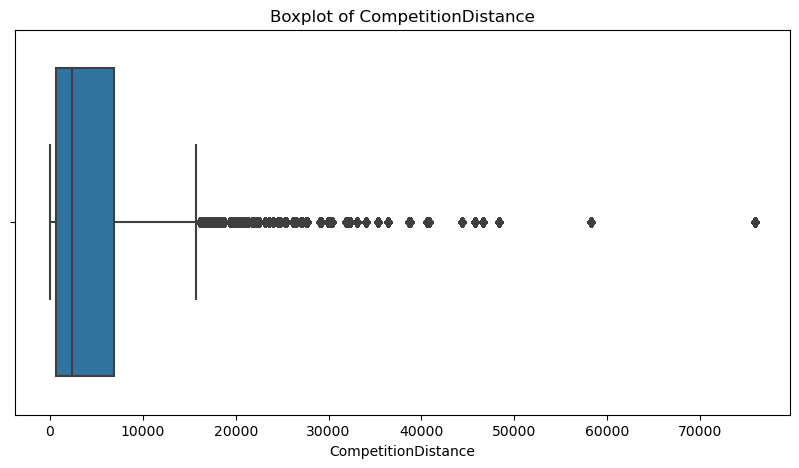

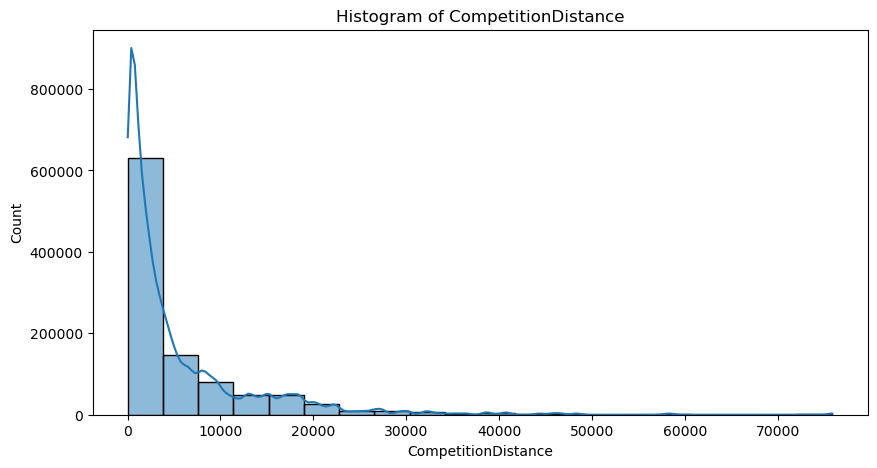

In [50]:
#Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x=working_file['CompetitionDistance'])
plt.title('Boxplot of CompetitionDistance')
plt.show()

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(working_file['CompetitionDistance'], bins=20, kde=True)
plt.title('Histogram of CompetitionDistance')
plt.show()

In [51]:
Store_open_data.CompetitionDistance.describe()

count    842206.000000
mean       5457.979627
std        7809.437311
min          20.000000
25%         710.000000
50%        2320.000000
75%        6890.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [52]:
missing_competition_distance = working_file[working_file['CompetitionDistance'].isnull()]

# Retrieve the Store IDs where CompetitionDistance is missing
store_ids_with_missing_competition_distance = missing_competition_distance['Store']

# If you want to see the result
print(store_ids_with_missing_competition_distance.unique())

[291 622 879]


In [53]:
# Define distance ranges
missing_values = working_file[['Store', 'CompetitionDistance']]
distance_ranges = [
    (0, 500),
    (500, 1000),
    (1000, 5000),
    (5000, 10000),
    (10000, 20000),
    (20000, 40000),
    (40000, 80000)
]

# Function to categorize distance into ranges
def categorize_distance(distance):
    for i, (start, end) in enumerate(distance_ranges):
        if start <= distance < end:
            return f"{start}-{end}m"
    return f">{distance_ranges[-1][1]}m"

# Apply categorization to create a new column 'DistanceRange'
missing_values['DistanceRange'] = missing_values['CompetitionDistance'].apply(categorize_distance)

# Pivot table to get counts of stores in each distance range for each StoreID
pivot_table = missing_values.groupby('DistanceRange')['Store'].nunique().reset_index(name='Unique Store Count')

# Print the pivot table
print(pivot_table)
print(pivot_table.describe())

C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\866248260.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_values['DistanceRange'] = missing_values['CompetitionDistance'].apply(categorize_distance)


  DistanceRange  Unique Store Count
0        0-500m                 218
1    1000-5000m                 434
2  10000-20000m                 130
3  20000-40000m                  49
4  40000-80000m                   8
5     500-1000m                 110
6   5000-10000m                 163
7       >80000m                   3
       Unique Store Count
count            8.000000
mean           139.375000
std            140.671794
min              3.000000
25%             38.750000
50%            120.000000
75%            176.750000
max            434.000000


**Pivot table shows that 70% stores has a competition distance between 0-20 km range and 58% have competition between 0-5km range**
**Median Distance calculation of stores having competion between 0-20km range**

In [54]:
median_distance = missing_values[missing_values['CompetitionDistance'].between(0, 20000, inclusive=True)]['CompetitionDistance'].median()
print(median_distance)

2170.0


C:\Users\huzai\AppData\Local\Temp\ipykernel_13160\3203011104.py:1: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  median_distance = missing_values[missing_values['CompetitionDistance'].between(0, 20000, inclusive=True)]['CompetitionDistance'].median()


***Using Median Imputation for Missing Competition Distance Values***

For stores with IDs "291, 622, 879," median imputation is chosen because:

- **Robustness:** Median imputation handles outliers and skewed distributions effectively, factors often present in competition distance data.
  
- **Representativeness:** Given that a significant majority of stores have distances within the 0-20000m range, the median within this interval accurately reflects the typical distance for most stores.
  
- **Simplicity:** Implementing and interpreting median imputation is straightforward, aligning well with the central tendency observed in the majority of stores' distance data.

In [55]:
inputs['CompetitionDistance'].fillna(median_distance, inplace=True)
test_inputs['CompetitionDistance'].fillna(median_distance, inplace=True)

#### Scaling Numeric Values

In [56]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

#### Encode Categorical Columns

In [57]:
inputs[categorical_cols]

,DayOfWeek,StateHoliday,StoreType,Assortment
0,5,0,c,a
1,4,0,c,a
2,3,0,c,a
3,2,0,c,a
4,1,0,c,a
...,...,...,...,...
1017202,1,0,d,c
1017204,6,0,d,c
1017205,5,0,d,c
1017206,4,0,d,c


In [58]:
inputs.StateHoliday=inputs["StateHoliday"].astype(str)

In [59]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

C:\Users\huzai\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
inputs.StateHoliday

0          0
1          0
2          0
3          0
4          0
          ..
1017202    0
1017204    0
1017205    0
1017206    0
1017207    0
Name: StateHoliday, Length: 844392, dtype: object

In [61]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

#### Extracting Data for training

In [62]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

### Train a gradient boosting model

In [63]:
from xgboost import XGBRegressor

# Initialize the model with similar parameters to GradientBoostingRegressor
model = XGBRegressor(
    n_estimators=20,          #This parameter specifies the number of boosting stages (or weak learners) to be used in the ensemble model.
    learning_rate=0.1,         #It controls the step size at each iteration while moving toward a minimum of the loss function.
    max_depth=4,               #This parameter sets the maximum depth of each individual tree.Limiting the depth helps control the complexity of the model, preventing overfitting
    random_state=42,           #This parameter ensures reproducibility by setting the seed for the random number generator.
    n_jobs=-1 )                # use all processors


# Train the model
model.fit(X, targets)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

#### Predicting

In [64]:
predicts = model.predict(X)
predicts

array([8152.506 , 8152.506 , 7567.952 , ..., 6119.1885, 6090.0195,
       6090.0195], dtype=float32)

#### Evaluation

In [65]:
def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [66]:
rmse(predicts, targets)

2616.6514050783844

### Feature Importance



In [67]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)


,feature,importance
1,Promo,0.456862
12,DayOfWeek_1,0.102521
24,StoreType_b,0.050875
2,SchoolHoliday,0.050433
27,Assortment_a,0.041423
9,Month,0.035781
5,Promo2,0.032687
11,WeekOfYear,0.032508
3,CompetitionDistance,0.030001
6,Promo2Open,0.025057


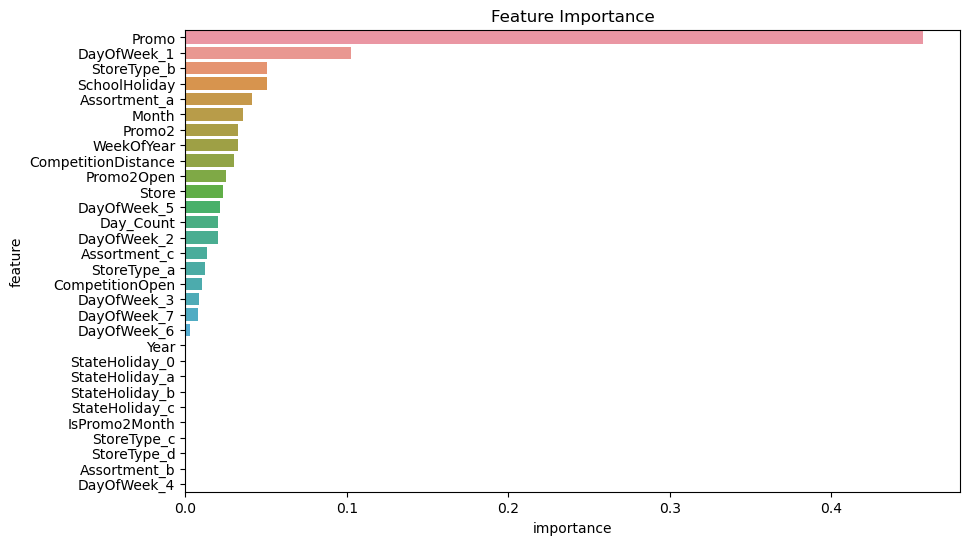

In [68]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

### K Fold Cross Validation
**Defining a helper function train_and_evaluate that trains a model with specified parameters and returns the trained model, along with the training and validation errors**


In [69]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [70]:
#uUsing KFold utility to create the different training/validations splits and train a separate model for each fold.
kfold = KFold(n_splits=5)

In [71]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=4, 
                                                     n_estimators=20)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 2395.3857744847332, Validation RMSE: 2207.5970874179093
Train RMSE: 2313.4582453080675, Validation RMSE: 2868.0262865675845
Train RMSE: 2284.802244562844, Validation RMSE: 2866.114499725002
Train RMSE: 2275.327753869688, Validation RMSE: 2897.5358633245924
Train RMSE: 2365.8782179827704, Validation RMSE: 2599.9378342049868


In [72]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
predicts_01 = predict_avg(models, X)
predicts_01

array([8148.8125, 8143.3228, 7386.3877, ..., 5860.3135, 5534.3193,
       5671.395 ], dtype=float32)

### Hyperparameter Tuning and Regularization

In [73]:
def test_params_kfold(n_splits, **params):
    train_rmses, val_rmses, models = [], [], []
    kfold = KFold(n_splits)
    for train_idxs, val_idxs in kfold.split(X):
        X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
        X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
        model, train_rmse, val_rmse = train_and_evaluate(X_train, train_targets, X_val, val_targets, **params)
        models.append(model)
        train_rmses.append(train_rmse)
        val_rmses.append(val_rmse)
    print('Train RMSE: {}, Validation RMSE: {}'.format(np.mean(train_rmses), np.mean(val_rmses)))
    return models

In [74]:
X_train, X_val, train_targets, val_targets = train_test_split(X, targets, test_size=0.1)

In [75]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

#### n-estimators

In [76]:
test_params(n_estimators=10)

Train RMSE: 2358.3625367062623, Validation RMSE: 2360.4433613135884


In [77]:
test_params(n_estimators=30)

Train RMSE: 1825.0826906539064, Validation RMSE: 1832.1971757216738


In [78]:
test_params(n_estimators=50)

Train RMSE: 1543.2481887168044, Validation RMSE: 1548.165584978369


In [79]:
test_params(n_estimators=100)

Train RMSE: 1174.4226249594647, Validation RMSE: 1181.157140107032


#### max_depth

In [80]:
test_params(max_depth=2)

Train RMSE: 2387.178217940455, Validation RMSE: 2382.708507141352


In [81]:
test_params(max_depth=5)

Train RMSE: 1421.543094871354, Validation RMSE: 1426.8940272443767


In [82]:
test_params(max_depth=8)

Train RMSE: 853.3131148195299, Validation RMSE: 881.4570689869147


In [83]:
test_params(max_depth=10)

Train RMSE: 667.87503126814, Validation RMSE: 761.0518099992322


#### learning rate

In [84]:
test_params(n_estimators=50, learning_rate=0.2)

Train RMSE: 1822.4965455556696, Validation RMSE: 1828.6469304305863


In [85]:
test_params(n_estimators=50, learning_rate=0.4)

Train RMSE: 1387.243386691365, Validation RMSE: 1396.198294559093


In [86]:
test_params(n_estimators=50, learning_rate=0.3)

Train RMSE: 1543.2481887168044, Validation RMSE: 1548.165584978369


In [87]:
test_params(n_estimators=50, learning_rate=0.8)

Train RMSE: 1141.845127769439, Validation RMSE: 1148.9816529627817


#### Booster

In [88]:
test_params(booster='gblinear')

Train RMSE: 2727.602840664092, Validation RMSE: 2722.4997809323127


### Final Predictions

In [89]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [90]:
model.fit(X, targets)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
test_predicts = model.predict(X_test) #predicts , predicts_01, test_predicts

In [92]:
test_predicts

array([ 3945.7744,  4433.105 ,  4938.3145, ..., 10388.764 ,  3924.5005,
        6660.3037], dtype=float32)

In [93]:
test_file

,Store,DayOfWeek,Date,Day,Month,Year,Sales,Customers,Open,Promo,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,WeekOfYear,Month_name,Day_Count,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,4,2015-09-17,Thursday,9,2015,NaN,NaN,1.0,1,...,0,NaN,NaN,NaN,38,September,17,84.0,0.000000,0
1,1,3,2015-09-16,Wednesday,9,2015,NaN,NaN,1.0,1,...,0,NaN,NaN,NaN,38,September,16,84.0,0.000000,0
2,1,2,2015-09-15,Tuesday,9,2015,NaN,NaN,1.0,1,...,0,NaN,NaN,NaN,38,September,15,84.0,0.000000,0
3,1,1,2015-09-14,Monday,9,2015,NaN,NaN,1.0,1,...,0,NaN,NaN,NaN,38,September,14,84.0,0.000000,0
4,1,7,2015-09-13,Sunday,9,2015,NaN,NaN,0.0,0,...,0,NaN,NaN,NaN,37,September,13,84.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1115,3,2015-08-05,Wednesday,8,2015,NaN,NaN,1.0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",32,August,5,0.0,38.295082,0
41084,1115,2,2015-08-04,Tuesday,8,2015,NaN,NaN,1.0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",32,August,4,0.0,38.295082,0
41085,1115,1,2015-08-03,Monday,8,2015,NaN,NaN,1.0,1,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",32,August,3,0.0,38.295082,0
41086,1115,7,2015-08-02,Sunday,8,2015,NaN,NaN,0.0,0,...,1,22.0,2012.0,"Mar,Jun,Sept,Dec",31,August,2,0.0,38.065574,0


In [94]:
test_file["Sales"]=test_predicts

In [95]:
test_file.columns

Index(['Store', 'DayOfWeek', 'Date', 'Day', 'Month', 'Year', 'Sales',
       'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'WeekOfYear',
       'Month_name', 'Day_Count', 'CompetitionOpen', 'Promo2Open',
       'IsPromo2Month'],
      dtype='object')

### Evaluation

In [96]:
model.score(X, targets)



0.9848796839797926

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Assuming 'model' is your trained model and 'X' is the input features, 'targets' are the true target values
predictions = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(targets, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(targets, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R2 score (Coefficient of Determination)
r2 = r2_score(targets, predictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MSE: 145701.4422522994
MAE: 278.1447534757564
RMSE: 381.70858289053365
R2 Score: 0.9848796839797926


### Saving File

In [98]:
test_file.to_csv('Prediction_file.csv', index=False)


## Saving Model

In [103]:
pickle.dump(model, open("Predicting_model.py", "wb"))

## Loading Model

In [104]:
loaded_pickle_model=pickle.load(open("Predicting_model.py","rb"))

In [105]:
checking_predictions=loaded_pickle_model.predict(X_test)

In [106]:
checking_predictions

array([ 3945.7744,  4433.105 ,  4938.3145, ..., 10388.764 ,  3924.5005,
        6660.3037], dtype=float32)